In [1]:
import json
import pickle
import matplotlib.pyplot as plt
import numpy as np
import mplhep as hep

In [2]:
plt.style.use(hep.style.CMS)

In [3]:
with open('all_ungroomed_ratios.json', 'r') as f:
    ugm = json.load(f)

In [4]:
with open('all_groomed_ratios.json', 'r') as f:
    grm = json.load(f)

In [5]:
with open('/scratch365/cmoore24/training/hgg/batch2025/ml_results_check/sub_ratios/100.pkl', 'rb') as f:
    train_ratios = pickle.load(f)
with open('/scratch365/cmoore24/training/hgg/batch2025/ml_results_check/sub_ratios/1291.pkl', 'rb') as f:
    test_ratios = pickle.load(f)

In [6]:
train_ratios[0]

'ugm_1e525/3e505**1_6666666666666667'

In [7]:
train_ks = {}
for i in train_ratios:
    if 'ugm' in i:
        train_ks[i] = ugm[i[4:].replace('_','.')]
    elif 'grm' in i:
        train_ks[i] = grm[i[4:].replace('_','.')]

test_ks = {}
for i in test_ratios:
    if 'ugm' in i:
        test_ks[i] = ugm[i[4:].replace('_','.')]
    elif 'grm' in i:
        test_ks[i] = grm[i[4:].replace('_','.')]

In [8]:
ugm_ks = [i for i in list(ugm.values()) if type(i) == float]
grm_ks = [i for i in list(grm.values()) if type(i) == float]

In [9]:
min(ugm_ks), max(ugm_ks)

(1.131223737660445, 3.8935736438663513)

In [10]:
min(grm_ks), max(grm_ks)

(1.2272016665556933, 4.280561149856297)

In [12]:
to_hist = grm_ks + ugm_ks

In [13]:
len(to_hist), len(test_ks)

(34479, 1291)

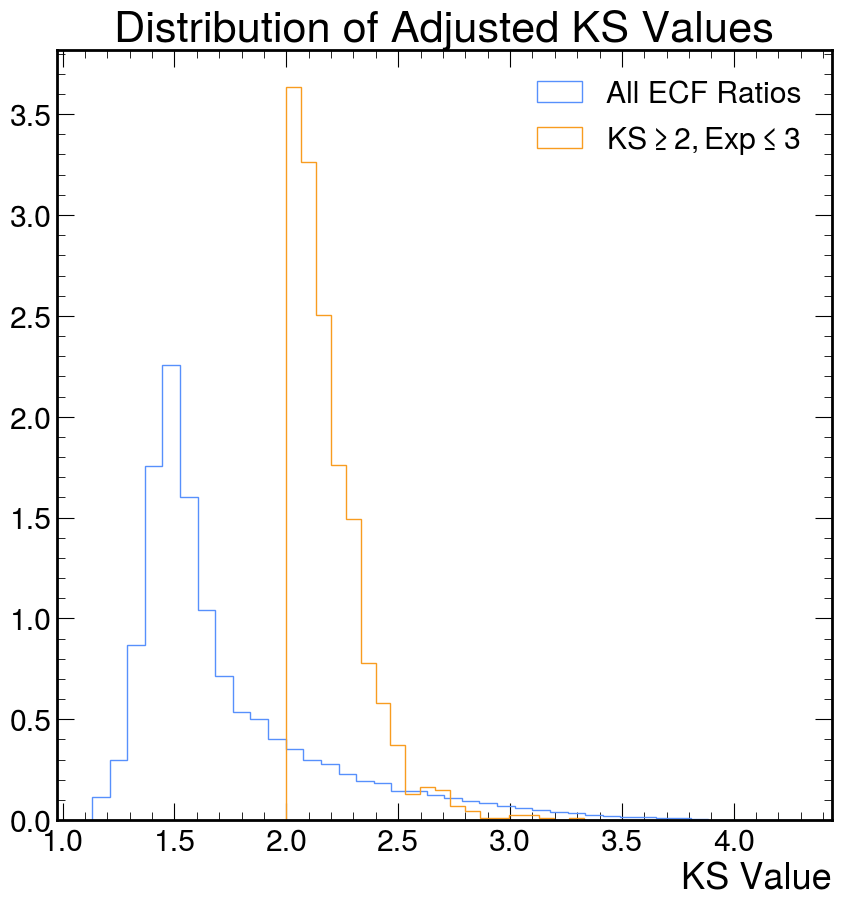

In [25]:
plt.hist(to_hist, bins=40, label=r"All ECF Ratios", density=True, histtype='step')
# plt.hist(list(train_ks.values()), bins=10, label='100 ECFs', density=True, histtype='step')
plt.hist(list(test_ks.values()), bins=20, label=r'$KS\geq 2, Exp \leq 3$', density=True, histtype='step')
plt.title('Distribution of Adjusted KS Values')
plt.xlabel('KS Value')
plt.legend()
plt.show()

In [31]:
min(list(train_ks.values())), max(list(train_ks.values()))

(2.000417394562464, 2.4592162176607397)

In [32]:
min(list(test_ks.values())), max(list(test_ks.values()))

(2.0001306744783625, 3.3295705521746344)

In [33]:
groomed = 0
ungroomed = 0
for i in train_ks:
    if 'ugm' in i:
        ungroomed += 1
    elif 'grm' in i:
        groomed += 1
groomed, ungroomed

(37, 63)

In [34]:
def entry_check(entry):

    dash = entry.find('/')
    asterisk = entry.find('*')
    numerator = entry[4:dash]
    denominator = entry[dash+1:asterisk]
    exponent = entry[asterisk+2:].replace('_','.')

    if float(exponent) > 3:
        return 0, 0

    if numerator[1] == 'e':
        nume = int(numerator[2])

    elif numerator[2] == 'e':
        nume = int(numerator[3])

    if denominator[1] == 'e':
        deno = int(denominator[2])

    elif denominator[2] == 'e':
        deno = int(denominator[3])

    return nume, deno

In [52]:
counts = {
    "5,5": [0, 0.0],
    "5,4": [0, 0.0],
    "5,3": [0, 0.0],
    "5,2": [0, 0.0],
    "4,4": [0, 0.0],
    "4,3": [0, 0.0],
    "4,2": [0, 0.0],
    "3,3": [0, 0.0],
    "3,2": [0, 0.0],
    "2,2": [0, 0.0],
}

counts_grm = {
    "grm": [0, 0.0],
    "ugm": [0, 0.0],
}

total = len(train_ks)

for i in train_ks:
    ra = entry_check(i)
    key = f"{ra[0]},{ra[1]}"
    if key in counts:
        counts[key][0] += 1
    counts_grm[i[:3]][0] += 1

for key in counts:
    counts[key][1] = counts[key][0] / total if total > 0 else 0.0
for key in counts_grm:
    counts_grm[key][1] = counts_grm[key][0] / total if total > 0 else 0.0

In [53]:
counts_grm

{'grm': [37, 0.37], 'ugm': [63, 0.63]}

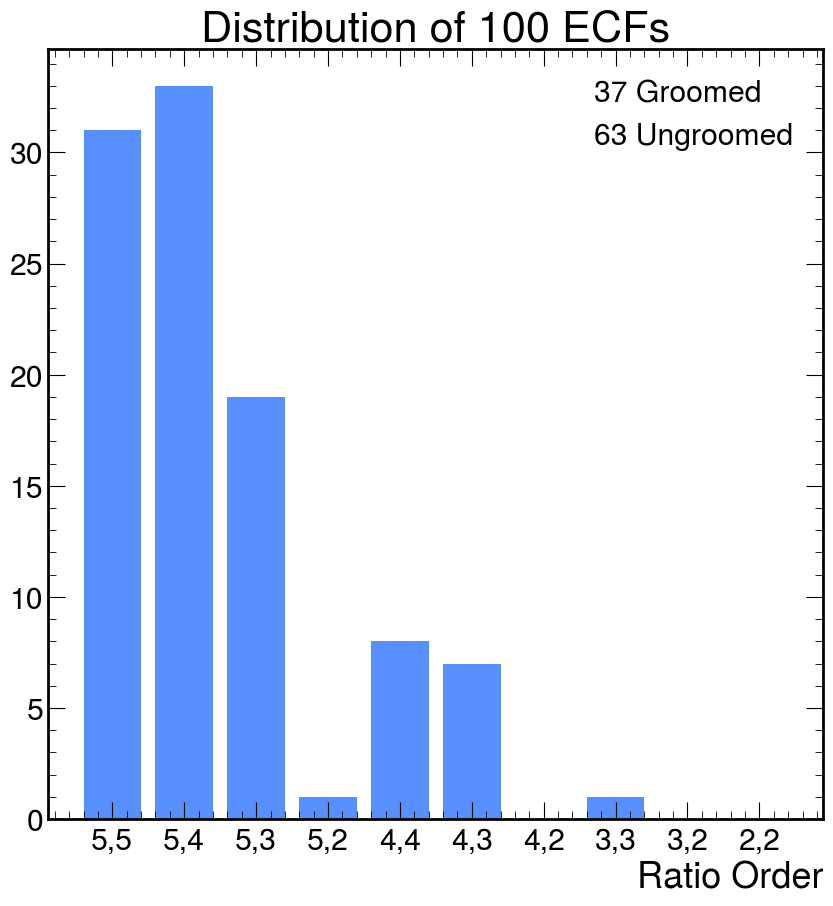

In [59]:
plt.bar(x=list(counts.keys()), height=np.array(list(counts.values()))[:,0])
plt.plot([], [], ' ', label='37 Groomed')
plt.plot([], [], ' ', label='63 Ungroomed')
plt.title('Distribution of 100 ECFs')
plt.xlabel('Ratio Order')
plt.legend()
plt.show()

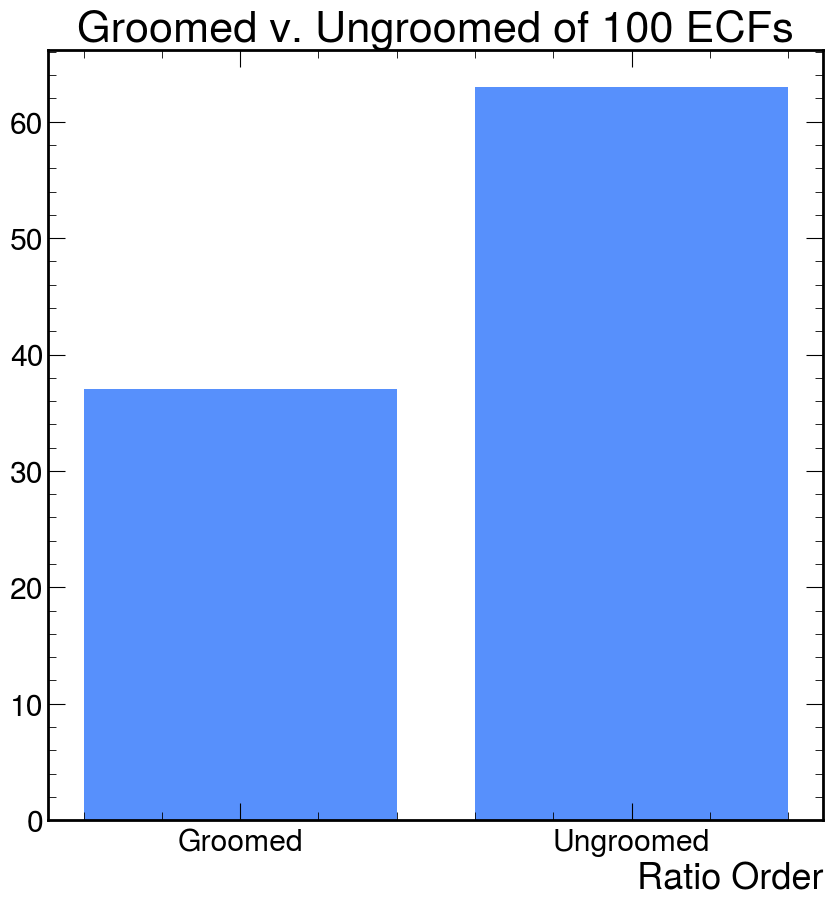

In [55]:
plt.bar(x=['Groomed', 'Ungroomed'], height=np.array(list(counts_grm.values()))[:,0])
plt.title('Groomed v. Ungroomed of 100 ECFs')
plt.xlabel('Ratio Order')
plt.show()

In [56]:
test_counts = {
    "5,5": [0, 0.0],
    "5,4": [0, 0.0],
    "5,3": [0, 0.0],
    "5,2": [0, 0.0],
    "4,4": [0, 0.0],
    "4,3": [0, 0.0],
    "4,2": [0, 0.0],
    "3,3": [0, 0.0],
    "3,2": [0, 0.0],
    "2,2": [0, 0.0],
}

test_counts_grm = {
    "grm": [0, 0.0],
    "ugm": [0, 0.0],
}

total = len(test_ks)

for i in test_ks:
    ra = entry_check(i)
    key = f"{ra[0]},{ra[1]}"
    if key in test_counts:
        test_counts[key][0] += 1
    test_counts_grm[i[:3]][0] += 1

for key in test_counts:
    test_counts[key][1] = test_counts[key][0] / total if total > 0 else 0.0
for key in counts_grm:
    test_counts_grm[key][1] = test_counts_grm[key][0] / total if total > 0 else 0.0

In [57]:
test_counts_grm

{'grm': [793, 0.6142525174283501], 'ugm': [498, 0.38574748257164987]}

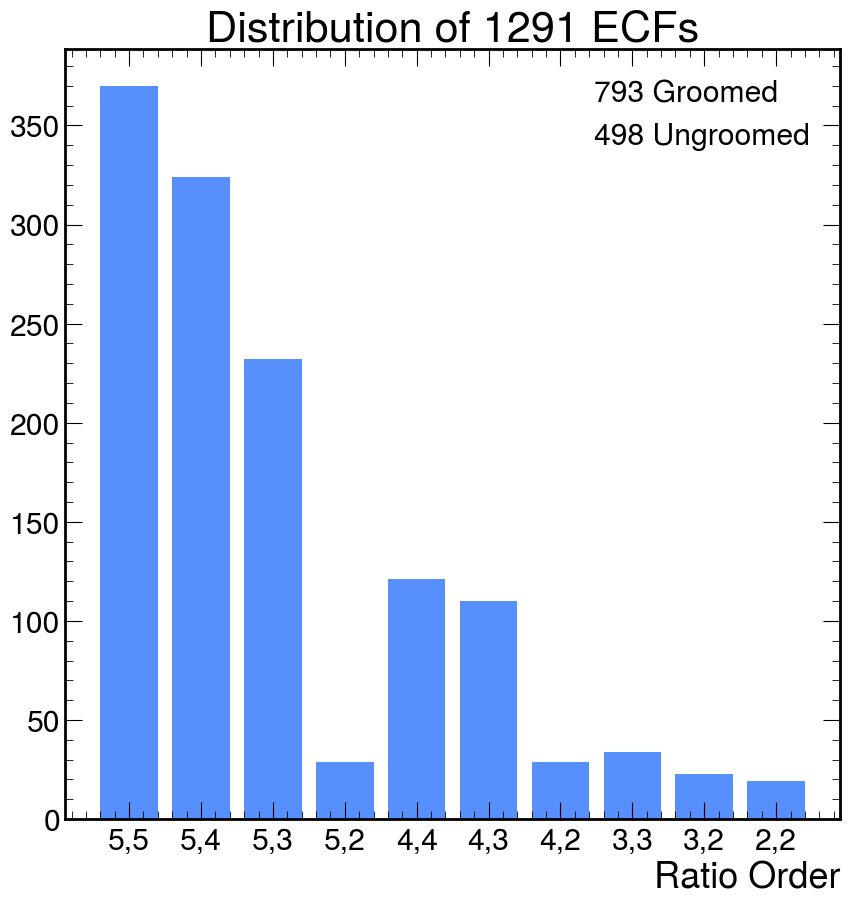

In [61]:
plt.bar(x=list(test_counts.keys()), height=np.array(list(test_counts.values()))[:,0])
plt.plot([], [], ' ', label='793 Groomed')
plt.plot([], [], ' ', label='498 Ungroomed')
plt.title('Distribution of 1291 ECFs')
plt.legend()
plt.xlabel('Ratio Order')
plt.show()

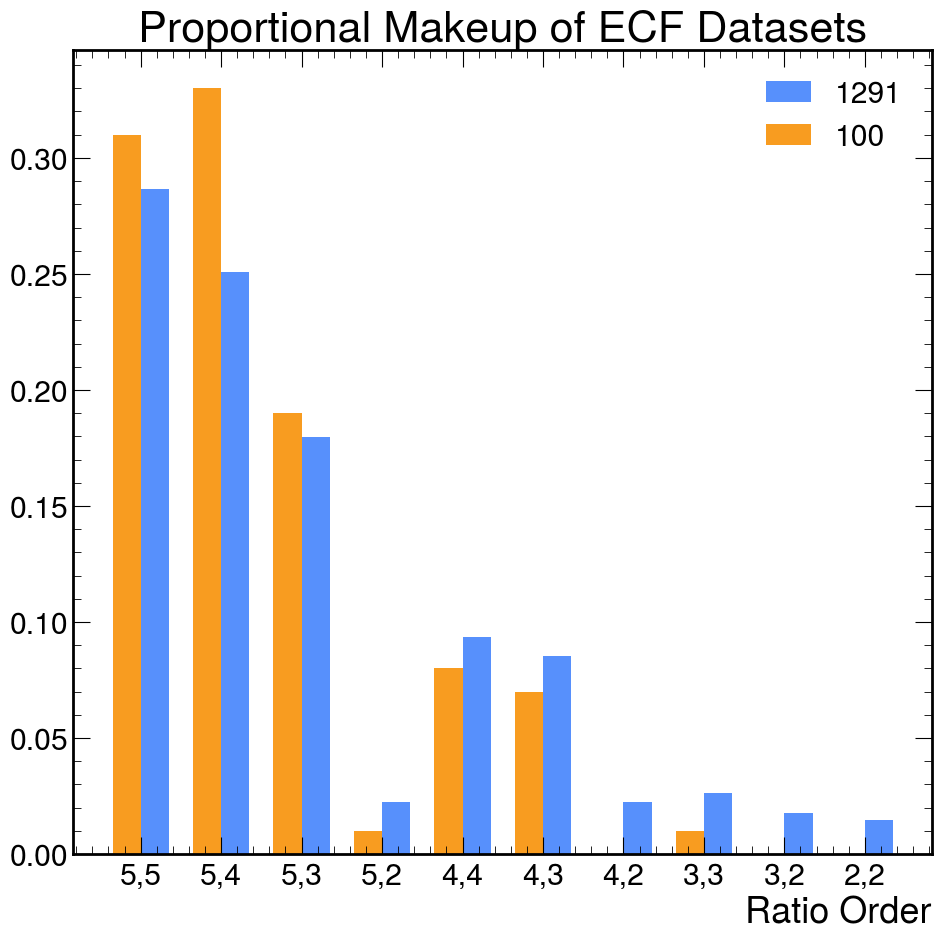

In [62]:
labels = list(counts.keys())

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
ax.bar(x + width/2, np.array(list(test_counts.values()))[:,1], width, label='1291')
ax.bar(x - width/2, np.array(list(counts.values()))[:,1], width, label='100')


ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=0)
ax.set_title('Proportional Makeup of ECF Datasets')
ax.legend()
ax.set_xlabel('Ratio Order')

plt.tight_layout()
plt.show()